# Analysis of Date feature
The analysis of the date feature is useful to understand possible encoding using dummy variables, it is important to undertand the trends of sales in different days of the week or different periods of the month/year to better decide what to include and what feature is important to have in the regression

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset = pd.read_csv('./dataset/train.csv')

### Defining functions in order to plot easier

In [54]:
pd.options.mode.chained_assignment = None  # default='warn'

def convert_to_date(sample):
    sample['Date'] = pd.to_datetime(sample['Date'],format='%d/%m/%Y')
    
def get_store_data(store_id):
    return dataset.loc[dataset['StoreID'] == store_id]
    

In [85]:
import matplotlib.dates as mdates

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
monthsFmt = mdates.DateFormatter('%m')
yearsFmt = mdates.DateFormatter('%Y')
monthsYearFmt = mdates.DateFormatter('%m-%Y')

# format the ticks
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsYearFmt)
ax.xaxis.set_minor_locator(months)

def plot_storeNo(store_id):
    sampleStore = get_store_data(store_id)
    convert_to_date(sampleStore)
    
    
    
    fig, ax = plt.subplots()
    ax.plot(sampleStore.Date, sampleStore.NumberOfSales)
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(monthsYearFmt)
    ax.xaxis.set_minor_locator(months)
    ax.grid(True)
    fig.autofmt_xdate()
    plt.show()

In [38]:
sampleStore = dataset.loc[dataset['StoreID'] == 1000]

In [17]:
s = sampleStore[:4]
s

,StoreID,Date,IsHoliday,IsOpen,HasPromotions,StoreType,AssortmentType,NearestCompetitor,Region,NumberOfCustomers,...,Mean_TemperatureC,Mean_VisibilityKm,Mean_Wind_SpeedKm_h,Min_Dew_PointC,Min_Humidity,Min_Sea_Level_PressurehPa,Min_TemperatureC,Min_VisibilitykM,Precipitationmm,WindDirDegrees
0,1000,01/03/2016,0,1,0,Hyper Market,General,326,7,495,...,1,11.0,16,-2,70,1029,1,6.0,0.0,23
1,1000,02/03/2016,0,1,0,Hyper Market,General,326,7,608,...,3,13.0,10,-2,58,1025,1,10.0,0.0,56
2,1000,04/03/2016,0,1,0,Hyper Market,General,326,7,665,...,3,11.0,10,-3,55,1023,2,8.0,0.0,22
3,1000,05/03/2016,0,1,0,Hyper Market,General,326,7,630,...,3,15.0,10,-6,25,1022,-1,10.0,0.0,108


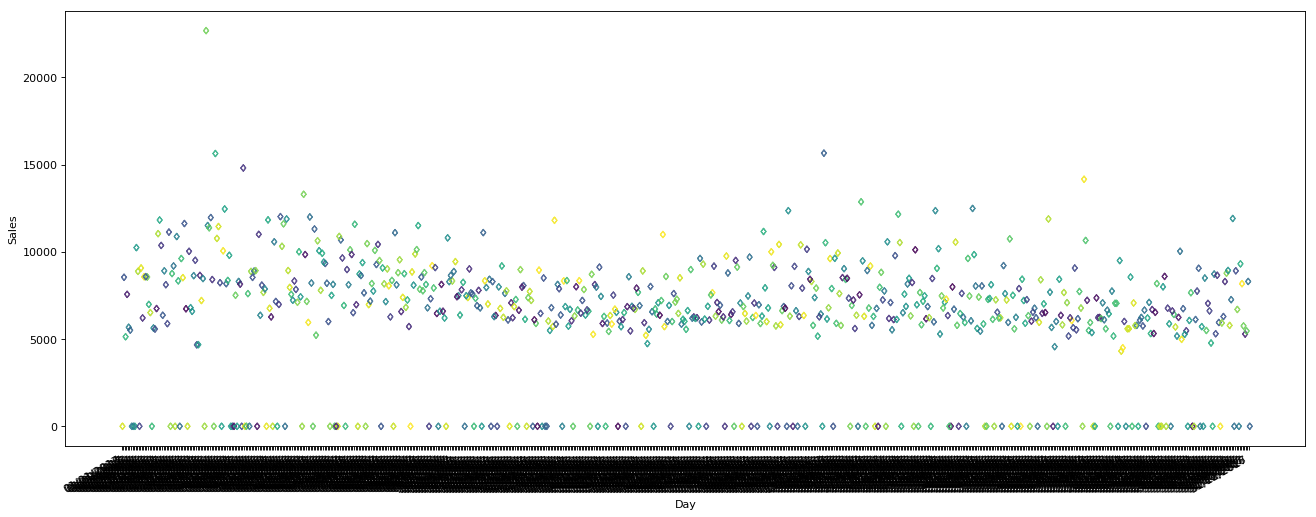

In [26]:
import datetime
import random
plt.rcParams['figure.figsize'] = [20.0,8.0]
plt.rcParams['figure.dpi']=80

#x = sampleStore['Date'][:100]
#y = sampleStore['NumberOfSales'][:100]
x = sampleStore['Date']
y = sampleStore['NumberOfSales']

plt.xlabel("Day")
plt.ylabel("Sales")

colors = np.random.rand(*x.shape)
# plot
plt.scatter(x, y, c=colors, marker=r'$\diamondsuit$', alpha=0.8)
# beautify the x-labels
plt.gcf().autofmt_xdate()

plt.show()

In [39]:
convert_to_date(sampleStore)

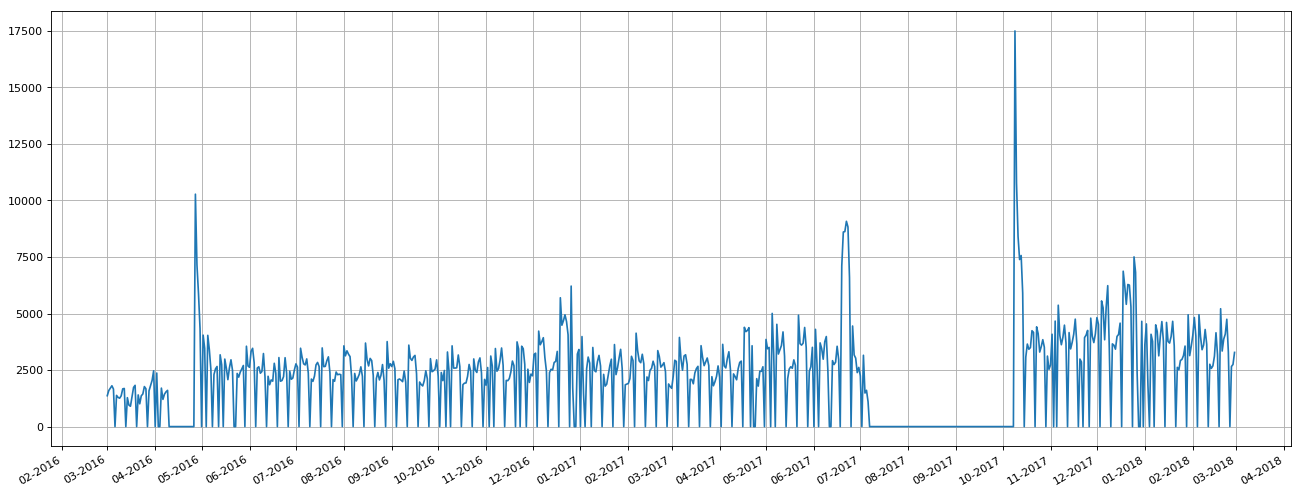

In [37]:
import matplotlib.dates as mdates

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
monthsFmt = mdates.DateFormatter('%m')
yearsFmt = mdates.DateFormatter('%Y')
monthsYearFmt = mdates.DateFormatter('%m-%Y')

fig, ax = plt.subplots()
ax.plot(sampleStore.Date, sampleStore.NumberOfSales)

# format the ticks
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsYearFmt)
ax.xaxis.set_minor_locator(months)

# round to nearest years...
#datemin = np.datetime64(r.date[0], 'Y')
#datemax = np.datetime64(r.date[-1], 'Y') + np.timedelta64(1, 'Y')
#ax.set_xlim(datemin, datemax)


# format the coords message box
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
#ax.format_ydata = price
ax.grid(True)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

plt.show()

Initial patterns I'm noticing: 
* Decreasing sales through the month
* Peak at the start of the month (probably due to monthly paycheck)
* Second and more subtle peak in the middle of the month (why?)
* Easter 2017 is anomalous for this store
* Need to drop 0-sells days


In [46]:
get_store_data(1002)
convert_to_date(sampleStore)

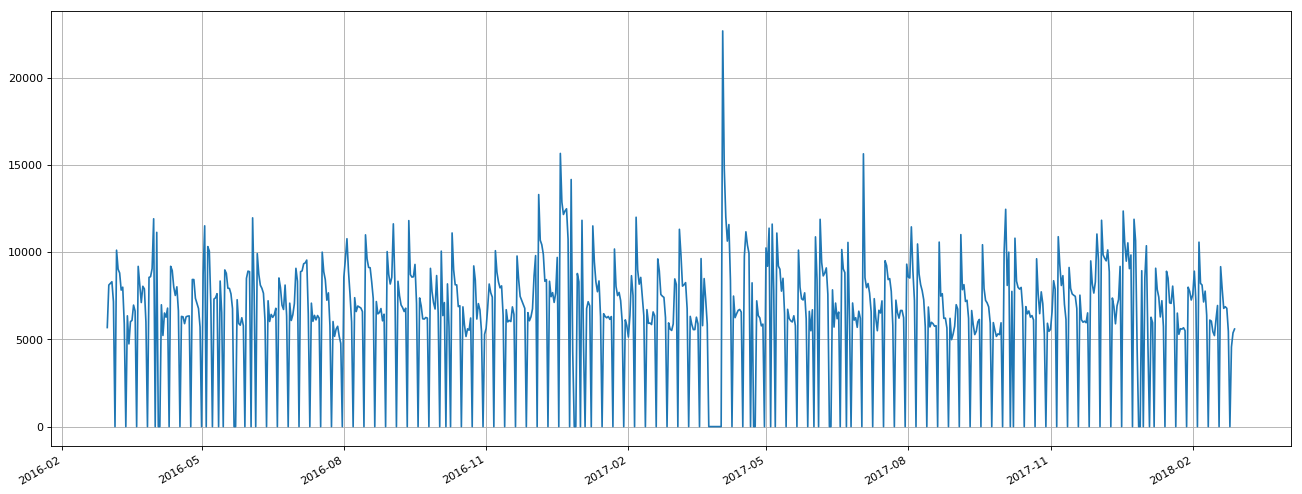

In [73]:
fig, ax = plt.subplots()
ax.plot(sampleStore.Date, sampleStore.NumberOfSales)

# format the ticks
#ax.xaxis.set_major_locator(months)
#ax.xaxis.set_major_formatter(monthsYearFmt)
#ax.xaxis.set_minor_locator(months)

#ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
#ax.format_ydata = price
ax.grid(True)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

plt.show()

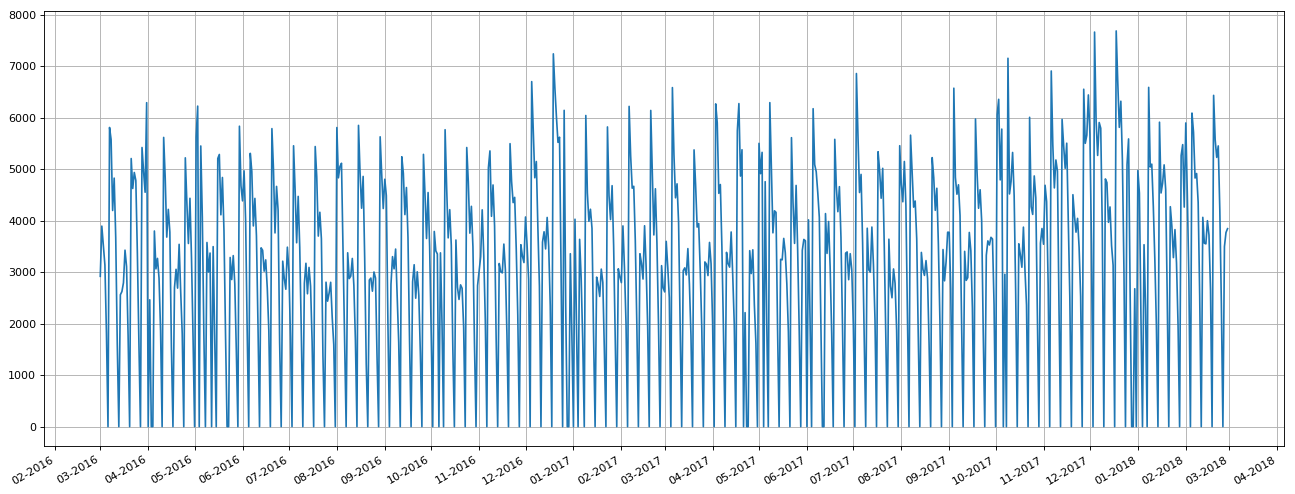

In [86]:
plot_storeNo(1023)

Next: to an average of all the stores, look at days of week, it is possible that the sales are not related to the weekend since sometimes there are 3 peaks a month 